In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib.image as mpimg
from glob import glob
import cv2

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [8]:
# from zipfile import ZipFile

# data_path = "D:\Rishabh Projects\Traffic Sign Recognition using CNN\traffic_Data.zip"
# with ZipFile(data_path, 'r') as zip:
#    zip.extractall()

In [9]:
# Path to the folder containing dataset
dataset = "D:/Rishabh Projects/Traffic Sign Recognition using CNN/traffic_Data/DATA"
# Path of the label file
labelfile = pd.read_csv("D:/Rishabh Projects/Traffic Sign Recognition using CNN/labels.csv")

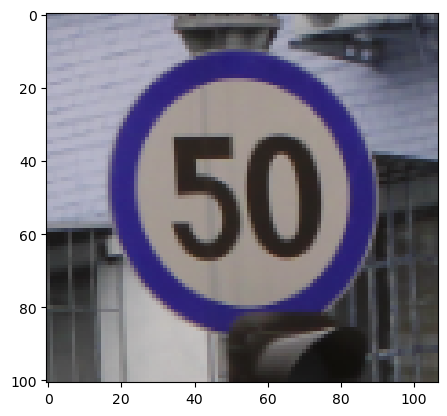

In [10]:
# Visualize few images
img = cv2.imread("D:/Rishabh Projects/Traffic Sign Recognition using CNN/traffic_Data/DATA/4/004_0001.png", cv2.IMREAD_COLOR)
plt.imshow(img)

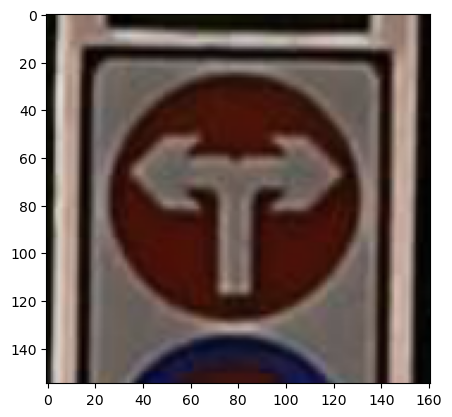

In [11]:
img = cv2.imread("D:/Rishabh Projects/Traffic Sign Recognition using CNN/traffic_Data/DATA/23/023_1_0002_1_j.png", cv2.IMREAD_COLOR)
plt.imshow(img)

In [12]:
print(labelfile.head())
print()
print(labelfile.tail())

   ClassId                  Name
0        0   Speed limit (5km/h)
1        1  Speed limit (15km/h)
2        2  Speed limit (30km/h)
3        3  Speed limit (40km/h)
4        4  Speed limit (50km/h)

    ClassId         Name
53       53     Give Way
54       54  No stopping
55       55     No entry
56       56     Unknown7
57       57     Unknown8


In [13]:
# Data Preparation for training and testing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset = 'training',
                                                               image_size = (224, 224),
                                                               seed = 123,
                                                               batch_size=16)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset = 'validation',
                                                               image_size = (224, 224),
                                                               seed = 123,
                                                               batch_size=16)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [14]:
class_numbers =  train_ds.class_names
class_names = []
for i in class_numbers:
    class_names.append(labelfile['Name'][int(i)])

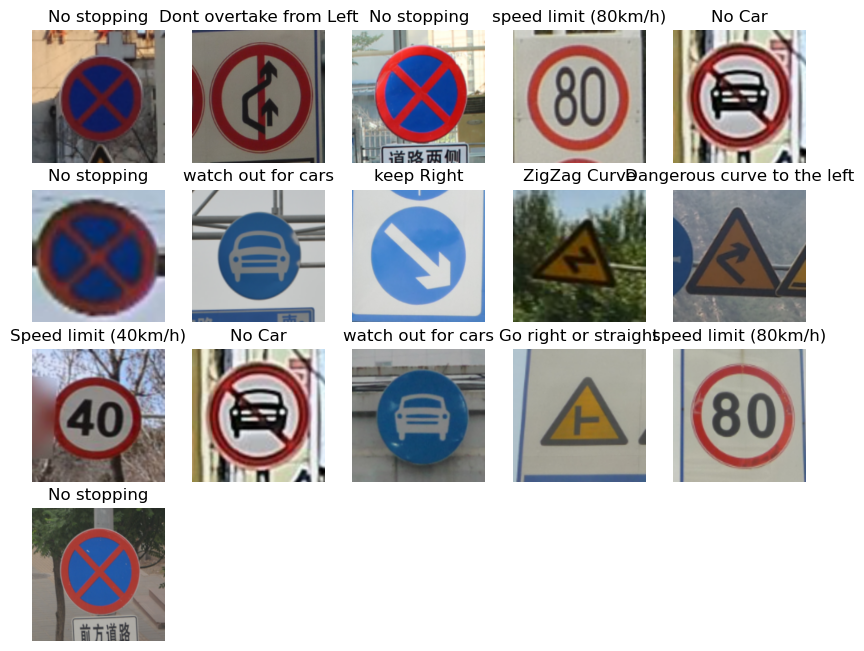

In [16]:
# Let's visualize train dataset and print 25 images from the dataset
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [17]:
# Data Augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical")

])

In [18]:
# Model building
model = Sequential()
model.add(data_augmentation)
model.add(tf.keras.layers.Rescaling(1./255))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(len(labelfile), activation = 'softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,821,562 (10.76 MB)

 Trainable params: 2,821,562 (10.76 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Model Compilation
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = 'adam',
              metrics = ['accuracy'])

In [21]:
mycallbacks = [EarlyStopping(monitor = 'val_loss', patience=5)]
history = model.fit(train_ds, validation_data = test_ds,
                    epochs = 50,
                    callbacks = mycallbacks)

Epoch 1/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 155s 740ms/step - accuracy: 0.2424 - loss: 2.8121 - val_accuracy: 0.3705 - val_loss: 2.2134
Epoch 2/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 153s 732ms/step - accuracy: 0.3542 - loss: 2.2144 - val_accuracy: 0.4772 - val_loss: 1.6681
Epoch 3/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 153s 735ms/step - accuracy: 0.4326 - loss: 1.8278 - val_accuracy: 0.5048 - val_loss: 1.4614
Epoch 4/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 153s 731ms/step - accuracy: 0.4417 - loss: 1.6750 - val_accuracy: 0.5695 - val_loss: 1.2947
Epoch 5/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 153s 731ms/step - accuracy: 0.5089 - loss: 1.5176 - val_accuracy: 0.6043 - val_loss: 1.2427
Epoch 6/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 153s 732ms/step - accuracy: 0.5470 - loss: 1.4529 - val_accuracy: 0.6559 - val_loss: 1.1297
Epoch 7/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 114s 543ms/step - accuracy: 0.5644 - loss: 1.3292 - val_accuracy: 0.6631 - val_loss: 1.0129
Epoch 8/50
209/209 ━━━━━━━━━━━━━━━━━━━━ 59s 281ms/step - accuracy: 0.5800 - 

Text(0.5, 1.0, 'Accuracy plot of Trainings vs Testing')

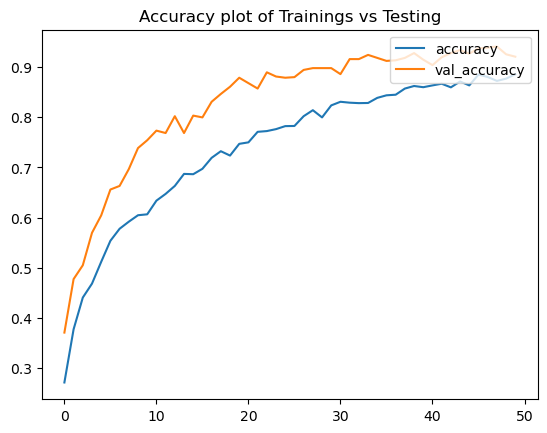

In [24]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
plt.title("Accuracy plot of Trainings vs Testing")

Text(0.5, 1.0, 'Loss plot of Trainings vs Testing')

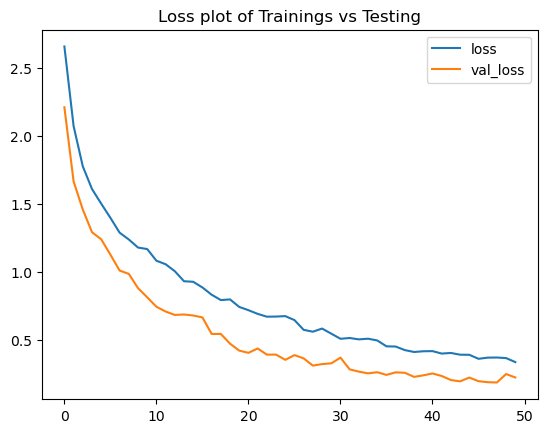

In [26]:
# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title("Loss plot of Trainings vs Testing")

Thank you for going through this till the end, feel free to get in touch if you have any questions... :)